#Hierarchial Clustering

##Data Preprocessing

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
dataset = pd.read_csv('Mall_Customers.csv')
# X = dataset.iloc[:, 3:].values
X = dataset.iloc[:, [3,4]].values
# X = dataset.iloc[:, :].values # running with all parameters / dependent variables


##Using Dendrogram to find the optimal number of clusters

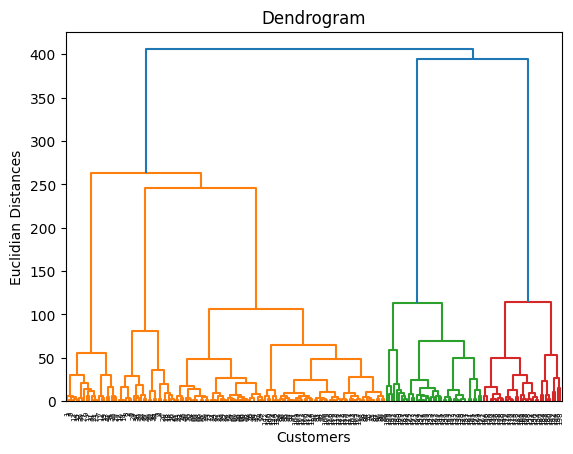

In [18]:
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidian Distances')
plt.show()

##Training the hierarchical model on the dataset

In [19]:
from sklearn.cluster import AgglomerativeClustering
numberOfClusters = 5
hc = AgglomerativeClustering(n_clusters=numberOfClusters, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

nOfSamples, nOfDepVariables=X.shape
print(nOfDepVariables)
print(y_hc)

2
[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


##Visualizing clusters if number of dependent variables ins 2

plotting the graph for visualisation


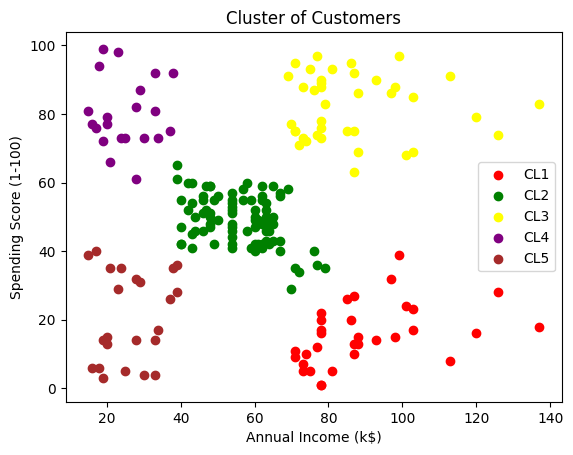

In [20]:
if (nOfDepVariables != 2):
  print('unable to plot graph as the number of dependent variables is not 2')
  exit

print("plotting the graph for visualisation")
cluster_colors=['red', 'green', 'yellow', 'purple', 'brown']
cluster_names = ['CL1', 'CL2', 'CL3', 'CL4', 'CL5']

# plt.scatter(X[:, 0:1], X[:,1:])
for i in range(0,numberOfClusters):
  plt.scatter(X[y_hc==i, 0], X[y_hc==i, 1], color=cluster_colors[i], label=cluster_names[i])
# plt.scatter(hc.cluster_centers_[:, 0], hc.cluster_centers_[:, 1], s=100, c='magenta', label='centroids')
plt.title('Cluster of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()